In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyrealsense2 as rs
from IPython.display import clear_output

print("Env ready")

ModuleNotFoundError: No module named 'pyrealsense2'

In [ ]:
# Create Pipeline
pipe = rs.pipeline()
cfg = rs.config()
print("Pipeline is created")

Pipeline is created


In [ ]:
# Find Realsense Device
print("Searching for Realsense Device")
selected_device = []

for d in rs.context().devices:
    selected_device.append(d)
    print("Device found: ", d.get_info(rs.camera_info.name))
if not selected_device:
    print("No Realsense Device found")
    exit(0)


Searching for Realsense Device
Device found:  Intel RealSense D415


In [ ]:
# Find RGB and Depth Sensor
rgb_sensor = depth_sensor = None

for device in selected_device:
    print("Required sensor for device: ", device.get_info(rs.camera_info.name))
    for s in device.sensors:
        if s.get_info(rs.camera_info.name) == 'RGB Camera':
            print(" - RGB sensor found")
            rgb_sensor = s
        if s.get_info(rs.camera_info.name) == 'Stereo Module':
            print(" - Depth sensor found")
            depth_sensor = s

Required sensor for device:  Intel RealSense D415
 - Depth sensor found
 - RGB sensor found


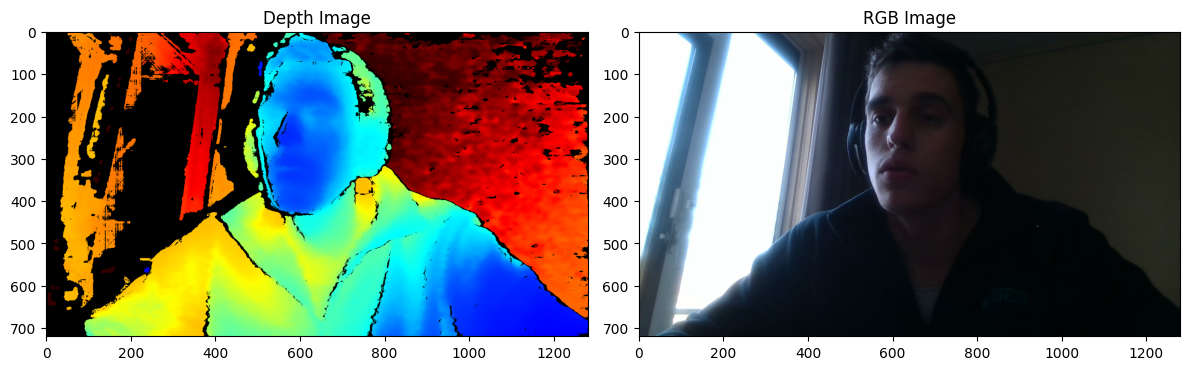

In [ ]:
# Displaying Depth and Color Frames
colorizer = rs.colorizer()


profile = pipe.start(cfg)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
title = ["Depth Image", "RGB Image"]

for _ in range(10):
    frameset = pipe.wait_for_frames()

for _ in range(1):
    frameset = pipe.wait_for_frames()
    depth_frame = frameset.get_depth_frame()
    color_frame = frameset.get_color_frame()

    colorized_stream = []

    if depth_frame:
        colorized_stream.append(np.asanyarray(colorizer.colorize(depth_frame).get_data()))
    if color_frame:
        colorized_stream.append(np.asanyarray(color_frame.get_data()))
    
    for i, ax in enumerate(axs.flatten()):
        if i >= len(colorized_stream): continue
        plt.sca(ax)
        plt.imshow(colorized_stream[i])
        plt.title(title[i])

    clear_output(wait=True)
    plt.tight_layout()
    plt.pause(1)
    plt.savefig('Picture.png')


pipe.stop()
print("Done!")

In [ ]:
deptmap = np.asanyarray(depth_frame.get_data())
print(deptmap.shape)
rgb = np.asanyarray(color_frame.get_data())
print(rgb.shape)
print(rgb)
"""
dm = []
for i in range(720):
    for j in range(1280):
        dm.append(deptmap[i][j])
dm = np.array(dm)

print(dm.max())
fig = plt.figure(2)
ax = plt.axes(projection='3d')
X = np.arange(0, 1280, 1)
Y = np.arange(0, 720, 1)
X, Y = np.meshgrid(X, Y)
Z = deptmap
ax.plot_surface(X, Y, np.log10(Z), rstride=1, cstride=1)
plt.show()

"""


(720, 1280)
(720, 1280, 3)
65535


C:\Users\felix\AppData\Local\Temp\ipykernel_5368\3812880396.py:19: RuntimeWarning: divide by zero encountered in log10
  ax.plot_surface(X, Y, np.log10(Z), rstride=1, cstride=1)
c:\Users\felix\AppData\Local\Programs\Python\Python39\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1539: RuntimeWarning: invalid value encountered in subtract
  v1 = polygons[..., i1, :] - polygons[..., i2, :]
c:\Users\felix\AppData\Local\Programs\Python\Python39\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1540: RuntimeWarning: invalid value encountered in subtract
  v2 = polygons[..., i2, :] - polygons[..., i3, :]
c:\Users\felix\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\numeric.py:1660: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
c:\Users\felix\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\numeric.py:1663: RuntimeWarning: invalid value encountered in multiply
  multiply(a2, b0, out=cp1)
c:\Users\felix\AppData\Local\P

KeyboardInterrupt: 